In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data for 2015
data15 = pd.read_excel('2015 - Dataset.xls')
data15.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582


# Data Exploration

In [3]:
# Checking NaNs and data types
data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Model Year                729 non-null    int64         
 1   Mfr Name                  729 non-null    object        
 2   Division                  729 non-null    object        
 3   Carline                   729 non-null    object        
 4   Engine Displacement       729 non-null    float64       
 5   # Cylinders               729 non-null    int64         
 6   Transmission              729 non-null    object        
 7   City FE                   729 non-null    int64         
 8   Highway FE                729 non-null    int64         
 9   Combined FE               729 non-null    int64         
 10  Air Aspiration Method     729 non-null    object        
 11  Transmission Description  729 non-null    object        
 12  # Gears               

In [4]:
# Descriptive statistics for the data
data15.describe()

,Model Year,Engine Displacement,# Cylinders,City FE,Highway FE,Combined FE,# Gears,City CO2,Highway CO2,Combined CO2
count,729.0,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,2015.0,3.154458,5.631001,20.075446,28.231824,23.021948,6.475995,470.871056,329.795610,407.340192
std,0.0,1.355437,1.806482,4.932073,5.798804,5.232198,1.170746,120.257495,71.974913,97.407477
min,2015.0,1.000000,3.000000,8.000000,15.000000,10.000000,1.000000,202.000000,199.000000,209.000000
25%,2015.0,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000,384.000000,278.000000,338.000000
50%,2015.0,3.000000,6.000000,20.000000,28.000000,23.000000,6.000000,453.000000,319.000000,393.000000
75%,2015.0,3.700000,6.000000,23.000000,32.000000,26.000000,7.000000,536.000000,370.000000,461.000000
max,2015.0,8.000000,16.000000,44.000000,46.000000,42.000000,9.000000,1050.000000,599.000000,847.000000


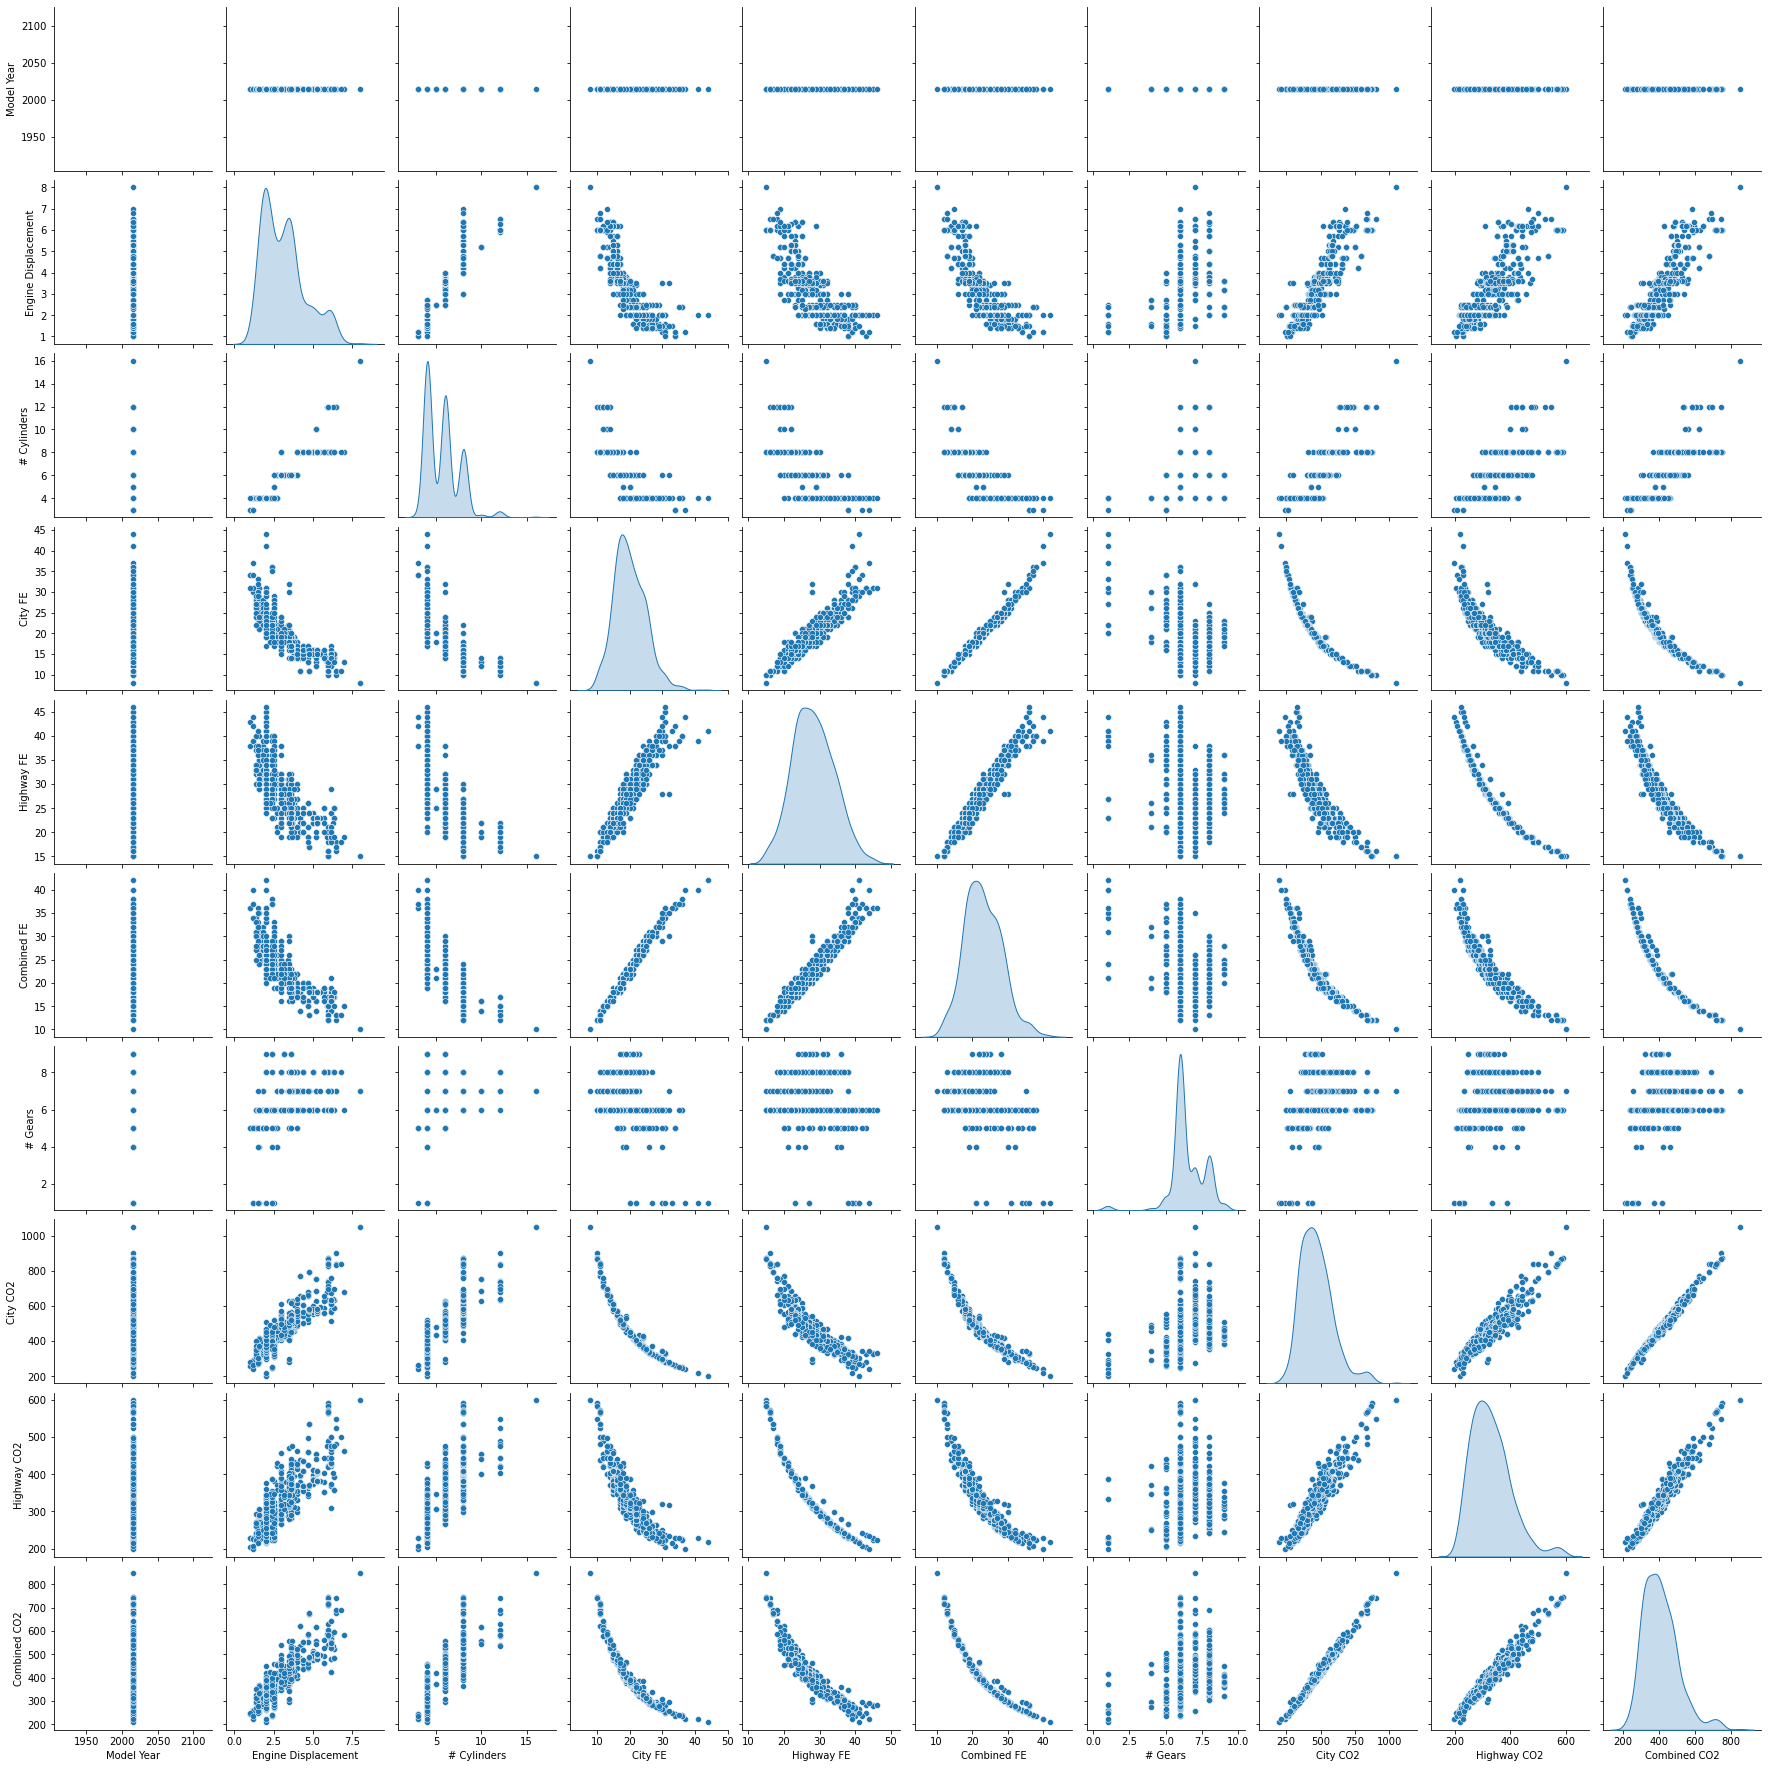

In [5]:
# Plotting pairwise relationships in the dataset
sns.pairplot(data15, diag_kind="kde")
plt.show()

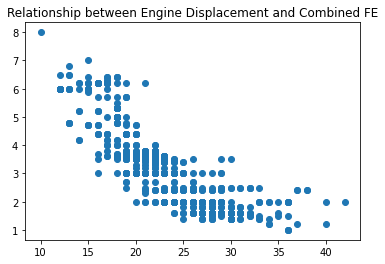

In [6]:
plt.scatter(data = data15 , x='Combined FE' , y = 'Engine Displacement') ;
plt.title('Relationship between Engine Displacement and Combined FE')
plt.show()

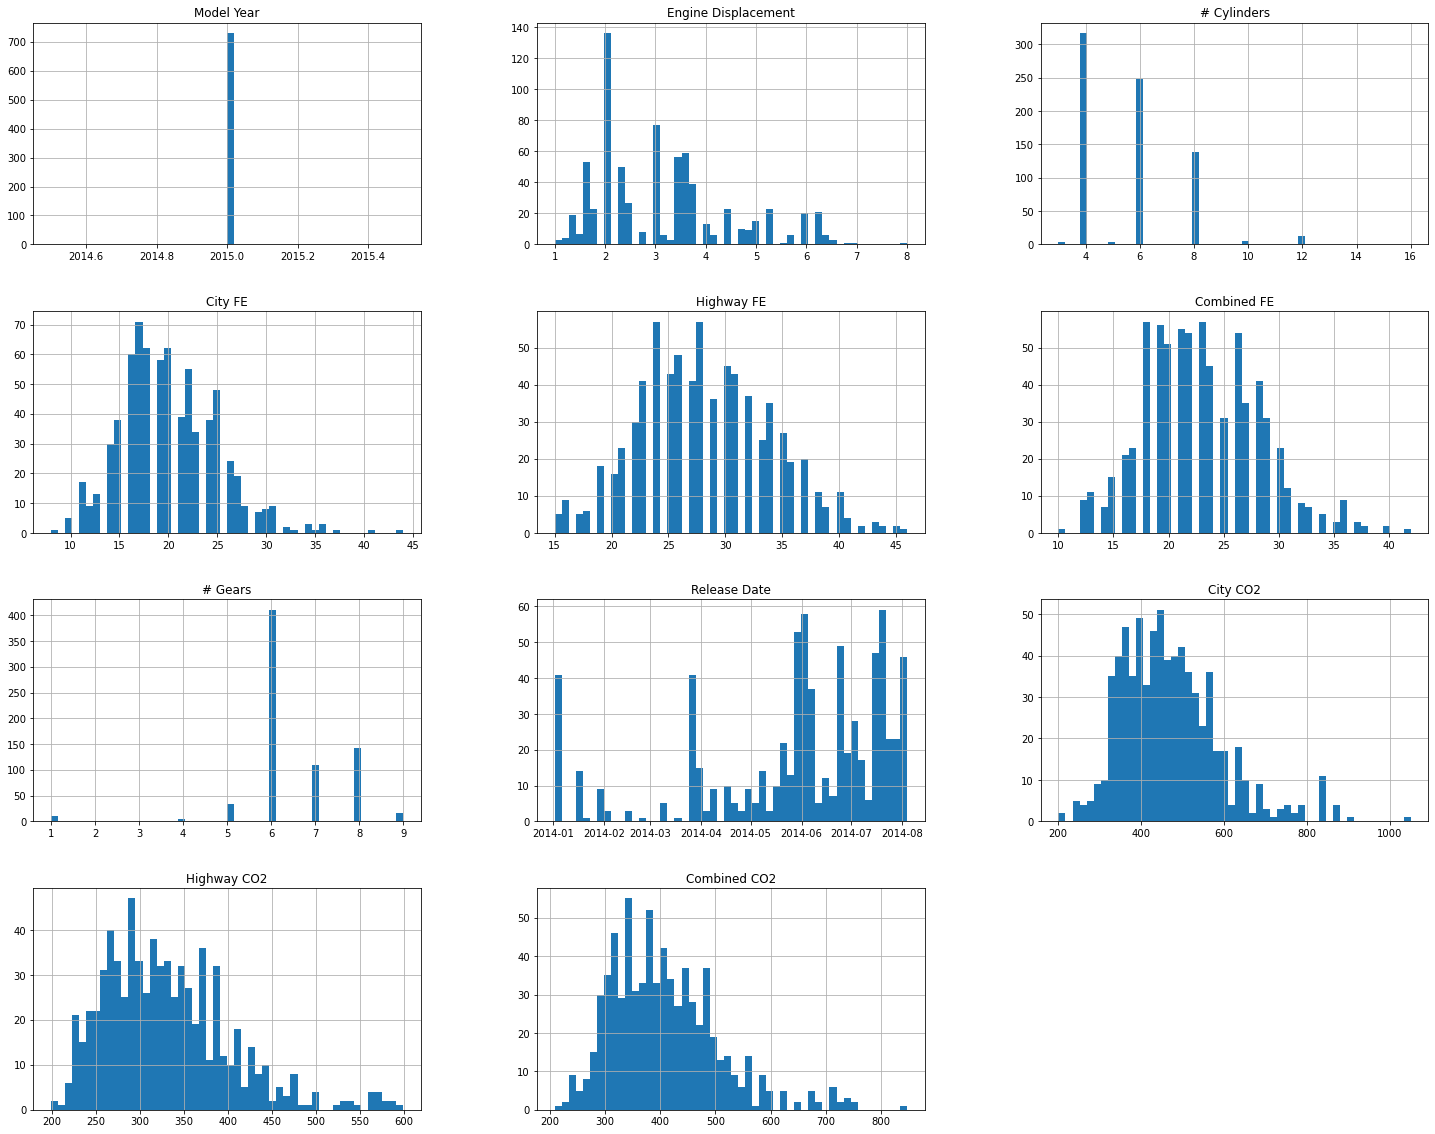

In [7]:
# Histograms from the data
data15.hist(bins=50, figsize=(25,20))
plt.show()

# Questions

### Question 1
#### Find the car manufacturer, which contains most quantity of car models e.g. BMW 3 series and BMW 5 series are different models.

In [8]:
question_1 = data15.groupby('Mfr Name').agg(Num_of_Models =('Carline','nunique'))
question_1.sort_values(by='Num_of_Models',ascending=False).head()

,Num_of_Models
Mfr Name,
BMW,86
General Motors,59
Volkswagen Group of,55
Porsche,31
Chrysler Group LLC,29


### Question 2
#### Find the top average fuel economy for the city and highway driving from the given data set.

In [9]:
# Top fuel economy for the city
data15['City FE'].max()

44

In [10]:
# Top fuel econmy for the highway
data15['Highway FE'].max()

46

In [11]:
# Average fuel econmy for the city
round(data15['City FE'].mean(),2)

20.08

In [12]:
# Average fuel econmy for the highway
round(data15['Highway FE'].mean(),2)

28.23

### Question 3
#### Find good and bad average fuel economy cars from all transmission types.

In [13]:
auto = data15.query('Transmission == "Auto"')
manual = data15.query('Transmission == "Manual"')

In [14]:
# Good average FE for auto
good_auto = (max(auto['City FE']) + max(auto['Highway FE']))/2
good_auto

44.5

In [15]:
# Good average FE for manual
good_manual= (max(manual['City FE']) + max(manual['Highway FE']))/2
good_manual

40.0

In [16]:
# Bad average FE for auto
bad_auto = (min(auto['City FE']) + min(auto['Highway FE']))/2
bad_auto

11.5

In [17]:
# Bad average FE for manual
bad_manual= (min(manual['City FE']) + min(manual['Highway FE']))/2
bad_manual

15.0

### Question 4
#### Find car manufacturers, which have 4WD (4-wheel drive) and 2WD (2-wheel drive) with engine power is more than 3.5.

In [18]:
data15['Drive Desc'].unique()

array(['2-Wheel Drive, Rear', 'All Wheel Drive', '2-Wheel Drive, Front',
       'd', '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [19]:
q4 = data15[(data15['Drive Desc'] == '2-Wheel Drive, Rear') | 
             (data15['Drive Desc'] == '2-Wheel Drive, Front') | 
             (data15['Drive Desc'] == '4-Wheel Drive')]
q4 = q4[q4['Engine Displacement'] > 3.5]
q4.groupby('Mfr Name').agg(Num_Cars =('Mfr Name','count'))

,Num_Cars
Mfr Name,
BMW,13
Chrysler Group LLC,29
Ford Motor Company,3
General Motors,72
Hyundai,5
Jaguar Land Rover L,12
Kia,2
MAZDA,2
Mercedes-Benz,11


### Question 5
#### Top 3 car manufacturers that have the lowest average CO2 for city and highway for 2015 ?

In [20]:
# For the city
city_co2 = data15.groupby('Mfr Name').agg(Avg_City_CO2 =('City CO2','mean')).round(2)
city_co2.sort_values(by='Avg_City_CO2').head(3)

,Avg_City_CO2
Mfr Name,
Mitsubishi Motors Co,355.54
MAZDA,360.38
Kia,401.65


In [21]:
# For the highway
highway_co2 = data15.groupby('Mfr Name').agg(Avg_Highway_CO2 =('Highway CO2','mean')).round(2)
highway_co2.sort_values(by='Avg_Highway_CO2').head(3)

,Avg_Highway_CO2
Mfr Name,
MAZDA,267.88
Mitsubishi Motors Co,275.38
Hyundai,290.42


### Question 6
### Which features are correlated with FE?

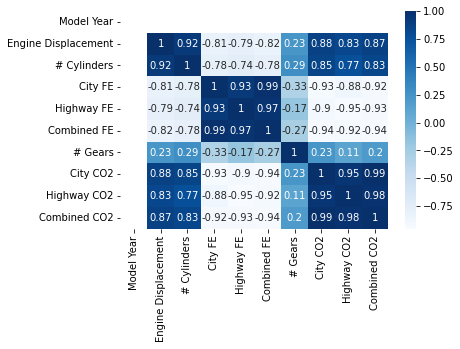

In [22]:
# Heatmap to show the correlation
corr = data15.corr()
sns.heatmap(corr, cmap = 'Blues',
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)
plt.show()
#positive correlation 
#negative correlation
#no correlation

#0.80 - 1.00 very strong correlation
#0.60 - 0.79 strong correlation
#0.40 - 0.59 moderate correlation
#0.20 - 0.39 weak correlation
#0.00 - 0.19 very weak correlation

# Getting data from 2016 to 2022

In [23]:
# Getting column names from the 2015 data
col_names =[]
for col_name in data15.columns: 
    col_names.append(col_name)
print(col_names)

['Model Year', 'Mfr Name', 'Division', 'Carline', 'Engine Displacement', '# Cylinders', 'Transmission', 'City FE', 'Highway FE', 'Combined FE', 'Air Aspiration Method', 'Transmission Description', '# Gears', 'Drive Desc', 'Carline Class Desc', 'Release Date', 'City CO2', 'Highway CO2', 'Combined CO2']


In [24]:
# Loading 2016 data to check columns
data16 = pd.read_excel('data_15-22\\2016.xlsx')
for cols in data16.columns:
    print(cols)

Model Year
Mfr Name
Division
Carline
Verify Mfr Cd
Index (Model Type Index)
Eng Displ
# Cyl
Transmission
City FE (Guide) - Conventional Fuel
Hwy FE (Guide) - Conventional Fuel
Comb FE (Guide) - Conventional Fuel
City Unadj FE - Conventional Fuel
Hwy Unadj FE - Conventional Fuel
Comb Unadj FE - Conventional Fuel
City Unrd Adj FE - Conventional Fuel
Hwy Unrd Adj FE - Conventional Fuel
Comb Unrd Adj FE - Conventional Fuel
Guzzler? 
Air Aspir Method
Air Aspiration Method Desc
Trans
Trans Desc
Trans, Other
# Gears
Lockup Torque Converter
Trans Creeper Gear
Drive Sys
Drive Desc
Max Ethanol % - Gasoline
Max Biodiesel %
Range1 - Model Type Driving Range - Conventional Fuel
Fuel Usage  - Conventional Fuel
Fuel Usage Desc - Conventional Fuel
Fuel Unit - Conventional Fuel
Fuel Unit Desc - Conventional Fuel
Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)
Gas Guzzler Exempt Desc (Where Truck = 1975 NHTSA truck definition)
2Dr Pass Vol
2Dr Lugg Vol
4Dr Pass Vol
4Dr Lugg Vol
Htchbk Pas

In [25]:
# Getting column names of interest
cols = ['Model Year', 'Mfr Name', 'Division', 'Carline', 'Eng Displ', '# Cyl', 'Trans',
        'City FE (Guide) - Conventional Fuel', 'Hwy FE (Guide) - Conventional Fuel', 'Comb FE (Guide) - Conventional Fuel',
        'Air Aspiration Method Desc', 'Trans Desc', '# Gears', 'Drive Desc', 'Carline Class Desc', 'Release Date',
        'City CO2 Rounded Adjusted','Hwy CO2 Rounded Adjusted','Comb CO2 Rounded Adjusted (as shown on FE Label)']

In [26]:
# Data Preparation function for 2016-2022 data

def load_data(data):
    data = data[cols].copy() #getting columns of interest
    data.columns = col_names #renaming columns based on 2015 data
    data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
    data = data.dropna(subset=['Release Date'])
    data['Transmission'].replace('M','Manual',inplace=True)
    data['Transmission'].replace('AM','Auto',inplace=True)
    data['Transmission'].replace('A','Auto',inplace=True)
    data['Transmission'].replace('AMS','Auto',inplace=True)
    return data

In [27]:
data16 = load_data(data16)
data16.head(3)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2016,FCA US LLC,ALFA ROMEO,4C,1.8,4,Auto,24,34,28,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Two Seaters,2015-08-17,365,259,317
1,2016,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2015-06-15,742,488,628
2,2016,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2015-06-29,655,426,552


In [28]:
data16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Model Year                1213 non-null   int64         
 1   Mfr Name                  1213 non-null   object        
 2   Division                  1213 non-null   object        
 3   Carline                   1213 non-null   object        
 4   Engine Displacement       1213 non-null   float64       
 5   # Cylinders               1213 non-null   int64         
 6   Transmission              1213 non-null   object        
 7   City FE                   1213 non-null   int64         
 8   Highway FE                1213 non-null   int64         
 9   Combined FE               1213 non-null   int64         
 10  Air Aspiration Method     1213 non-null   object        
 11  Transmission Description  1213 non-null   object        
 12  # Gears             

### Repeat loading steps for data from 2017-2022

In [29]:
data17 = pd.read_excel('data_15-22\\2017.xlsx')
data17 = load_data(data17)

In [30]:
data18 = pd.read_excel('data_15-22\\2018.xlsx')
data18 = load_data(data18)

In [31]:
data19 = pd.read_excel('data_15-22\\2019.xlsx')
data19 = load_data(data19)

In [32]:
data20 = pd.read_excel('data_15-22\\2020.xlsx')
data20 = load_data(data20)

In [33]:
data21 = pd.read_excel('data_15-22\\2021.xlsx')
data21 = load_data(data21)

In [34]:
data22 = pd.read_excel('data_15-22\\2022.xlsx')
data22 = load_data(data22)

In [35]:
# Merging data from 2015 to 2022
data15_22 = pd.concat([data15,data16,data17,data18,data19,data20,data21,data22])
data15_22.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582


In [36]:
data15_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9248 entries, 0 to 1150
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Model Year                9248 non-null   int64         
 1   Mfr Name                  9248 non-null   object        
 2   Division                  9248 non-null   object        
 3   Carline                   9248 non-null   object        
 4   Engine Displacement       9248 non-null   float64       
 5   # Cylinders               9248 non-null   int64         
 6   Transmission              9248 non-null   object        
 7   City FE                   9248 non-null   int64         
 8   Highway FE                9248 non-null   int64         
 9   Combined FE               9248 non-null   int64         
 10  Air Aspiration Method     9248 non-null   object        
 11  Transmission Description  9248 non-null   object        
 12  # Gears             

In [37]:
data15_22.describe()

,Model Year,Engine Displacement,# Cylinders,City FE,Highway FE,Combined FE,# Gears,City CO2,Highway CO2,Combined CO2
count,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000,9248.000000
mean,2018.637651,3.127163,5.608456,20.583910,27.594074,23.178958,7.066285,463.049632,338.677011,407.223616
std,2.178395,1.335031,1.860299,5.982789,6.131346,5.948218,1.747509,117.887436,75.577633,97.103702
min,2015.000000,0.900000,3.000000,8.000000,11.000000,9.000000,1.000000,152.000000,149.000000,151.000000
25%,2017.000000,2.000000,4.000000,17.000000,23.000000,19.000000,6.000000,382.000000,285.000000,338.000000
50%,2019.000000,3.000000,6.000000,20.000000,27.000000,22.000000,7.000000,452.000000,330.000000,398.000000
75%,2021.000000,3.600000,6.000000,23.000000,31.000000,26.000000,8.000000,535.000000,384.000000,467.000000
max,2022.000000,8.400000,16.000000,58.000000,60.000000,59.000000,10.000000,1135.000000,818.000000,979.000000


In [38]:
# Model names for each manufacturer from 2015 to 2022
extended_models = data15_22.groupby('Mfr Name').agg(Num_of_Models =('Carline','nunique'))
extended_models.sort_values(by='Num_of_Models',ascending=False)

,Num_of_Models
Mfr Name,
BMW,275
Mercedes-Benz,197
General Motors,159
Ford Motor Company,152
Volkswagen Group of,147
Toyota,145
Jaguar Land Rover L,109
Nissan,96
FCA US LLC,94


In [39]:
data15['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [40]:
data15_22['Transmission'].unique()

array(['Auto', 'Manual', 'SA', 'SCV', 'CVT'], dtype=object)

In [41]:
# Get only Auto and Manual Transmissions
data15_22 = data15_22[(data15_22.Transmission == 'Auto') | (data15_22.Transmission == 'Manual')]
data15_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 1129
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Model Year                4786 non-null   int64         
 1   Mfr Name                  4786 non-null   object        
 2   Division                  4786 non-null   object        
 3   Carline                   4786 non-null   object        
 4   Engine Displacement       4786 non-null   float64       
 5   # Cylinders               4786 non-null   int64         
 6   Transmission              4786 non-null   object        
 7   City FE                   4786 non-null   int64         
 8   Highway FE                4786 non-null   int64         
 9   Combined FE               4786 non-null   int64         
 10  Air Aspiration Method     4786 non-null   object        
 11  Transmission Description  4786 non-null   object        
 12  # Gears             

In [42]:
# data15_22.to_csv('data15_22.csv',index=False)

### Question 7
#### How has the city CO2 changed from 2015 to 2022 for (grams per mile)?

In [43]:
q7 = data15_22.groupby(['Mfr Name','Model Year']).agg(AVG_CityCO2 =('City CO2','mean'))
q7

AVG_CityCO2
Mfr Name     Model Year             
BMW          2015         436.193277
             2016         456.212766
             2017         459.900000
             2018         454.073171
             2019         455.648649
...                              ...
aston martin 2016         678.571429
             2017         805.000000
             2020         636.000000
             2021         640.000000
             2022         540.333333

[173 rows x 1 columns]

In [45]:
q7.to_csv('co2_manu_year.csv')
q7 = pd.read_csv('co2_manu_year.csv')
q7

,Mfr Name,Model Year,AVG_CityCO2
0,BMW,2015,436.193277
1,BMW,2016,456.212766
2,BMW,2017,459.900000
3,BMW,2018,454.073171
4,BMW,2019,455.648649
...,...,...,...
168,aston martin,2016,678.571429
169,aston martin,2017,805.000000
170,aston martin,2020,636.000000
171,aston martin,2021,640.000000


In [46]:
# Getting top 5 manufacturers registered for all years
top_mnf = q7.groupby('Mfr Name').agg(num_years =('Mfr Name','count'))
top_mnf.sort_values(by='num_years',ascending=False).head()

,num_years
Mfr Name,
BMW,8
Mitsubishi Motors Co,8
Nissan,8
Porsche,8
MAZDA,8


#### BMW

In [47]:
bmw = q7[q7['Mfr Name'] == 'BMW']
bmw = bmw[(bmw['Model Year'] == 2015) | (bmw['Model Year'] == 2022)]
bmw

,Mfr Name,Model Year,AVG_CityCO2
0,BMW,2015,436.193277
7,BMW,2022,365.736842


In [48]:
#bmw.loc[0]
bmw_co2_change = bmw.loc[0][2] - bmw.loc[7][2]
bmw_co2_change_perc = round(bmw_co2_change*100/bmw.loc[0][2],2)
bmw_co2_change_perc

16.15

#### Porsche

In [49]:
porsche = q7[q7['Mfr Name'] == 'Porsche']
porsche = porsche[(porsche['Model Year'] == 2015) | (porsche['Model Year'] == 2022)]
porsche

,Mfr Name,Model Year,AVG_CityCO2
126,Porsche,2015,481.425532
133,Porsche,2022,507.666667


In [50]:
porsche_co2_change = porsche.loc[126][2] - porsche.loc[133][2]
print(porsche_co2_change)
porsche_co2_change_perc = round(porsche_co2_change*100/porsche.loc[126][2],2)
porsche_co2_change_perc

-26.241134751773075


-5.45

#### Nissan

In [51]:
nissan = q7[q7['Mfr Name'] == 'Nissan']
nissan = nissan[(nissan['Model Year'] == 2015) | (nissan['Model Year'] == 2022)]
nissan

,Mfr Name,Model Year,AVG_CityCO2
115,Nissan,2015,466.052632
122,Nissan,2022,328.000000


In [52]:
nissan_co2_change = nissan.loc[115][2] - nissan.loc[122][2]
print(nissan_co2_change)
nissan_co2_change_perc = round(nissan_co2_change*100/nissan.loc[115][2],2)
nissan_co2_change_perc

138.05263157894734


29.62

#### Mazda

In [53]:
mazda = q7[q7['Mfr Name'] == 'MAZDA']
mazda = mazda[(mazda['Model Year'] == 2015) | (mazda['Model Year'] == 2022)]
mazda

,Mfr Name,Model Year,AVG_CityCO2
75,MAZDA,2015,360.375
82,MAZDA,2022,352.000


In [54]:
mazda_co2_change = mazda.loc[75][2] - mazda.loc[82][2]
print(mazda_co2_change)
mazda_co2_change_perc = round(mazda_co2_change*100/mazda.loc[75][2],2)
mazda_co2_change_perc

8.375


2.32

#### Mitsubishi

In [55]:
mits = q7[q7['Mfr Name'] == 'Mitsubishi Motors Co']
mits = mits[(mits['Model Year'] == 2015) | (mits['Model Year'] == 2022)]
mits

,Mfr Name,Model Year,AVG_CityCO2
106,Mitsubishi Motors Co,2015,355.538462
113,Mitsubishi Motors Co,2022,265.000000


In [56]:
mits_co2_change = mits.loc[106][2] - mits.loc[113][2]
print(mits_co2_change)
mits_co2_change_perc = round(mits_co2_change*100/mits.loc[106][2],2)
mits_co2_change_perc

90.53846153846155


25.47

### Question 8
#### How has the average Combined FE changed from 2015 to 2022 for Toyota, BMW and Mercedes-Benz?

In [57]:
q8 = data15_22.groupby(['Mfr Name','Model Year']).agg(AVG_Combined_FE =('Combined FE','mean'))
q8.to_csv('comFE_manu_year.csv')
q8 = pd.read_csv('comFE_manu_year.csv')
q8

,Mfr Name,Model Year,AVG_Combined_FE
0,BMW,2015,24.294118
1,BMW,2016,23.404255
2,BMW,2017,23.200000
3,BMW,2018,23.390244
4,BMW,2019,23.108108
...,...,...,...
168,aston martin,2016,15.285714
169,aston martin,2017,13.000000
170,aston martin,2020,17.000000
171,aston martin,2021,16.000000


In [58]:
q8 = q8[(q8['Mfr Name'] == 'Toyota') | (q8['Mfr Name'] == 'BMW') | (q8['Mfr Name'] == 'Mercedes-Benz')]
round(q8,2)

,Mfr Name,Model Year,AVG_Combined_FE
0,BMW,2015,24.29
1,BMW,2016,23.40
2,BMW,2017,23.20
3,BMW,2018,23.39
4,BMW,2019,23.11
5,BMW,2020,23.45
6,BMW,2021,26.46
7,BMW,2022,28.21
98,Mercedes-Benz,2015,21.03
99,Mercedes-Benz,2016,21.33


### Question 9
#### How much has the combined FE improved in transmission types?

In [59]:
transmission_15 = data15_22[data15_22['Model Year'] == 2015]
transmission_15 = round(transmission_15.groupby('Transmission').agg(AVG_Combined_FE = ('Combined FE','mean')))
transmission_15

,AVG_Combined_FE
Transmission,
Auto,23.0
Manual,25.0


In [60]:
transmission_22 = data15_22[data15_22['Model Year'] == 2022]
transmission_22 = round(transmission_22.groupby('Transmission').agg(AVG_Combined_FE = ('Combined FE','mean')))
transmission_22

,AVG_Combined_FE
Transmission,
Auto,21.0
Manual,23.0


In [61]:
diff_transmission = transmission_22 - transmission_15
diff_transmission.dropna()
diff_transmission

,AVG_Combined_FE
Transmission,
Auto,-2.0
Manual,-2.0


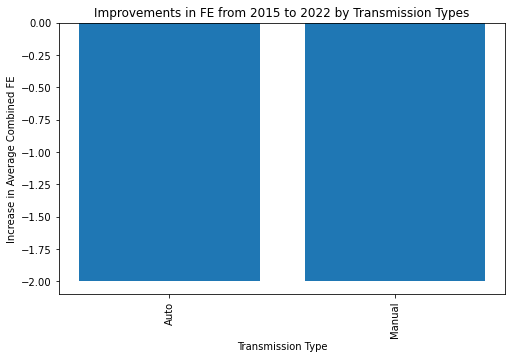

In [62]:
plt.subplots(figsize=(8, 5))
plt.bar(diff_transmission.index, diff_transmission['AVG_Combined_FE'])
plt.title('Improvements in FE from 2015 to 2022 by Transmission Types')
plt.xticks(rotation=90)
plt.xlabel('Transmission Type')
plt.ylabel('Increase in Average Combined FE');

### Question 10
#### How much has the combined FE improved in carline classes?

In [63]:
carline_15 = data15_22[data15_22['Model Year'] == 2015]
carline_15 = round(carline_15.groupby('Carline Class Desc').agg(AVG_Combined_FE = ('Combined FE','mean')),2)
carline_15

,AVG_Combined_FE
Carline Class Desc,
Compact Cars,25.74
Large Cars,20.99
Midsize Cars,25.44
Minicompact Cars,23.74
Small Pick-up Trucks 2WD,20.00
Small Pick-up Trucks 4WD,18.25
Small SUV 2WD,23.96
Small SUV 4WD,22.14
Small Station Wagons,26.28


In [64]:
carline_22 = data15_22[data15_22['Model Year'] == 2022]
carline_22 = round(carline_22.groupby('Carline Class Desc').agg(AVG_Combined_FE = ('Combined FE','mean')),2)
carline_22

,AVG_Combined_FE
Carline Class Desc,
Compact Cars,27.50
Large Cars,24.42
Midsize Cars,24.12
Midsize Station Wagons,23.00
Minicompact Cars,20.41
Small Pick-up Trucks 2WD,22.57
Small Pick-up Trucks 4WD,20.09
Small SUV 2WD,26.47
Small SUV 4WD,23.95


In [65]:
diff = carline_22 - carline_15
diff.dropna(inplace=True)
diff_improved = diff[diff['AVG_Combined_FE']>0]
diff_improved

,AVG_Combined_FE
Carline Class Desc,
Compact Cars,1.76
Large Cars,3.43
Small Pick-up Trucks 2WD,2.57
Small Pick-up Trucks 4WD,1.84
Small SUV 2WD,2.51
Small SUV 4WD,1.81
Small Station Wagons,6.50
Special Purpose Vehicle 2WD,6.00
"Special Purpose Vehicle, minivan 2WD",0.67


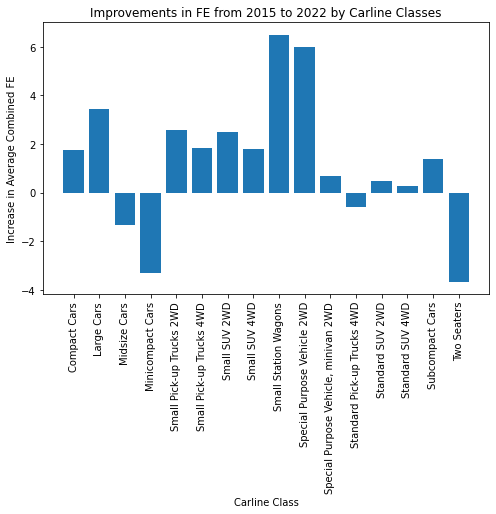

In [66]:
plt.subplots(figsize=(8, 5))
plt.bar(diff.index, diff['AVG_Combined_FE'])
plt.xticks(rotation=90)
plt.title('Improvements in FE from 2015 to 2022 by Carline Classes')
plt.xlabel('Carline Class')
plt.ylabel('Increase in Average Combined FE');

### Adding data with Smog Rating

In [67]:
# Adding data with SMOG rating
def smog_data(data):
    
    data = data[cols].copy()
    data.columns = col_names
    data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
    data = data.dropna(subset=['Release Date'])
    data['Transmission'].replace('M','Manual',inplace=True)
    data['Transmission'].replace('AM','Auto',inplace=True)
    data['Transmission'].replace('A','Auto',inplace=True)
    data['Transmission'].replace('AMS','Auto',inplace=True)
    return data

In [68]:
col_names.append('SmogRating')
print(col_names)
cols.append('#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)')
print(cols)

['Model Year', 'Mfr Name', 'Division', 'Carline', 'Engine Displacement', '# Cylinders', 'Transmission', 'City FE', 'Highway FE', 'Combined FE', 'Air Aspiration Method', 'Transmission Description', '# Gears', 'Drive Desc', 'Carline Class Desc', 'Release Date', 'City CO2', 'Highway CO2', 'Combined CO2', 'SmogRating']
['Model Year', 'Mfr Name', 'Division', 'Carline', 'Eng Displ', '# Cyl', 'Trans', 'City FE (Guide) - Conventional Fuel', 'Hwy FE (Guide) - Conventional Fuel', 'Comb FE (Guide) - Conventional Fuel', 'Air Aspiration Method Desc', 'Trans Desc', '# Gears', 'Drive Desc', 'Carline Class Desc', 'Release Date', 'City CO2 Rounded Adjusted', 'Hwy CO2 Rounded Adjusted', 'Comb CO2 Rounded Adjusted (as shown on FE Label)', '#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)']


In [69]:
data15 = pd.read_excel('data_15-22\\2015.xlsx')
data15 =smog_data(data15)

data16 = pd.read_excel('data_15-22\\2016.xlsx')
data16 =smog_data(data16)

data17 = pd.read_excel('data_15-22\\2017.xlsx')
data17 = load_data(data17)

data18 = pd.read_excel('data_15-22\\2018.xlsx')
data18 = load_data(data18)

data19 = pd.read_excel('data_15-22\\2019.xlsx')
data19 = load_data(data19)

data20 = pd.read_excel('data_15-22\\2020.xlsx')
data20 = load_data(data20)

data21 = pd.read_excel('data_15-22\\2021.xlsx')
data21 = load_data(data21)

data22 = pd.read_excel('data_15-22\\2022.xlsx')
data22 = load_data(data22)

data15_22 = pd.concat([data15,data16,data17,data18,data19,data20,data21,data22])
data15_22.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2,SmogRating
0,2015,FCA Italy,Alfa Romeo,4C,1.8,4,Auto,24,34,28,Turbocharged,Automated Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-06-30,365,259,317,5
1,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628,5
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552,5
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582,5
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552,5


In [70]:
# data15_22.to_csv('smog_data.csv',index=False)

In [71]:
data15_22['SmogRating'].value_counts()

5      3866
3      2009
6      1740
7      1382
1       450
8       172
9        56
Mod      39
2        30
4        15
Name: SmogRating, dtype: int64

### Question 11
#### For the years between 2015 to 2022, which manufacturer has the most polluting cars?

In [72]:
polluting = data15_22[data15_22['SmogRating'] == 1]
polluting.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2,SmogRating
68,2016,Pagani Automobili S,Pagani Automobili S.p.A.,Huayra Coupe,6.0,12,Auto,11,17,13,Turbocharged,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2015-07-01,798,516,671,1
121,2018,BMW,BMW,M6 Convertible,4.4,8,Manual,15,22,17,Turbocharged,Manual,6,"2-Wheel Drive, Rear",Subcompact Cars,2017-03-31,612,411,522,1
122,2018,BMW,BMW,M6 Convertible,4.4,8,Auto,14,20,16,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,"2-Wheel Drive, Rear",Subcompact Cars,2017-03-31,650,435,553,1
123,2018,BMW,BMW,M6 Gran Coupe,4.4,8,Manual,15,22,17,Turbocharged,Manual,6,"2-Wheel Drive, Rear",Compact Cars,2017-03-31,612,411,522,1
124,2018,BMW,BMW,M6 Gran Coupe,4.4,8,Auto,14,20,16,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,"2-Wheel Drive, Rear",Compact Cars,2017-03-31,650,435,553,1


In [73]:
round((polluting.groupby('Mfr Name').agg(AVG_Combined_CO2 =('Combined CO2','mean'))).sort_values(by='AVG_Combined_CO2',ascending=False)).head()

,AVG_Combined_CO2
Mfr Name,
Volkswagen Group of,678.0
Pagani Automobili S,671.0
Koenigsegg,625.0
BMW,538.0
Maserati,525.0


#### Carlines for those 5 manufacturers

In [74]:
# polluting Volkswagen Group of carline
round(polluting[polluting['Mfr Name'] == 'Volkswagen Group of'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean'))).head()

,AVG_Combined_CO2
Carline,
Aventador Countach,787.0
Aventador Coupe,791.0
Aventador Roadster,798.0
Aventador S Coupe,731.0
Aventador S Roadster,751.0


In [75]:
# polluting Pagani Automobili S carline
round(polluting[polluting['Mfr Name'] == 'Pagani Automobili S'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
Huayra,671.0
Huayra Coupe,671.0


In [76]:
# polluting Koenigsegg carline
round(polluting[polluting['Mfr Name'] == 'Koenigsegg'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
Agera RS,654.0
REGERA,610.0


In [77]:
# polluting BMW carline
polluting[polluting['Mfr Name'] == 'BMW'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean'))

,AVG_Combined_CO2
Carline,
M6 Convertible,537.5
M6 Gran Coupe,537.5


In [78]:
# polluting Maserati carline
round(polluting[polluting['Mfr Name'] == 'Maserati'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean'))).head()

,AVG_Combined_CO2
Carline,
GHIBLI,460.0
GHIBLI S,460.0
GHIBLI S Q4,474.0
GHIBLI TROFEO,560.0
GRANTURISMO CONVERTIBLE,569.0


### Question 12
#### For the years between 2015 to 2022, which manufactureris the cleanest? 

In [79]:
cleanest = data15_22[data15_22['SmogRating'] == 9]
cleanest.head()

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2,SmogRating
38,2015,Honda,Honda,CR-Z,1.5,4,SCV,36,39,37,Naturally Aspirated,Selectable Continuously Variable (e.g. CVT wit...,7,"2-Wheel Drive, Front",Two Seaters,2014-09-01,247,227,238,9
39,2015,Honda,Honda,CR-Z,1.5,4,Manual,31,38,34,Naturally Aspirated,Manual,6,"2-Wheel Drive, Front",Two Seaters,2014-09-01,285,232,261,9
152,2015,Volkswagen Group of,Audi,A3,1.8,4,Auto,23,33,27,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Subcompact Cars,2014-02-25,379,267,328,9
154,2015,Volkswagen Group of,Audi,A3 Cabriolet,1.8,4,Auto,24,35,28,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Subcompact Cars,2014-06-02,362,256,314,9
155,2015,Volkswagen Group of,Audi,A3 Cabriolet quattro,2.0,4,Auto,23,32,26,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,All Wheel Drive,Subcompact Cars,2014-06-02,379,280,334,9


In [80]:
round((cleanest.groupby('Mfr Name').agg(AVG_Combined_CO2 =('Combined CO2','mean'))).sort_values(by='AVG_Combined_CO2',ascending=True)).head()

,AVG_Combined_CO2
Mfr Name,
Honda,263.0
MAZDA,271.0
Hyundai,292.0
Kia,293.0
Volkswagen Group of,317.0


In [81]:
# cleanest Honda carline
round(cleanest[cleanest['Mfr Name'] == 'Honda'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
ACCORD,297.0
CIVIC,252.0
CIVIC HF,253.0
CR-Z,250.0


In [82]:
# cleanest Mazda carline
round(cleanest[cleanest['Mfr Name'] == 'MAZDA'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
MAZDA3 4-Door,268.0
MAZDA3 5-Door,274.0


In [83]:
# cleanest Hyundai carline
round(cleanest[cleanest['Mfr Name'] == 'Hyundai'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
Sonata HYBRID,237.0
Sonata HYBRID LIMITED,239.0
Tucson AWD,401.0


In [84]:
# cleanest Kia carline
round(cleanest[cleanest['Mfr Name'] == 'Kia'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean')))

,AVG_Combined_CO2
Carline,
Optima HYBRID,237.0
Optima HYBRID EX,242.0
Sportage AWD,400.0


In [85]:
# cleanest Volkswagen Group of carline
round(cleanest[cleanest['Mfr Name'] == 'Volkswagen Group of'].groupby('Carline').agg(AVG_Combined_CO2=('Combined CO2','mean'))).head()

,AVG_Combined_CO2
Carline,
A3,328.0
A3 Cabriolet,314.0
A3 Cabriolet quattro,334.0
A3 quattro,323.0
GTI,315.0
